# 2D Echo or Anti-Echo Reconstruction with MRAi and CS

In [7]:
import time
import numpy as np
import nmrglue as ng
import MRAi_2D as ma
import Proc_2D as pr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':25})

### Define the path (direction) of the Echo spectrum process in pipe format.
Here as an example, the path to US 2D H-N—TROSY spectrum of protein MALT1 is used. Then Echo spectrum is prepared based on the US.
Replace this paths with your actual spectrum file.

In [8]:
%%time
spectrum_direction = "Spectra/Malt.ft2"
dic , Ref = ng.pipe.read(spectrum_direction)
Echo = pr.convertors.VE_to_E(Ref)
Anti = pr.convertors.VE_to_AE(Ref)

CPU times: user 48.2 ms, sys: 4.1 ms, total: 52.3 ms
Wall time: 52.6 ms


### Call the function with the default direction that runs the trained network for Echo or Anti-Echo reconstruction.

In [9]:
%%time
DNN_dirc = "Trained_NN/Echo/"
WNN_Echo = ma.Production.Echo_Rec(Echo,DNN_dirc+"EAE/")
WNN_Anti = pr.convertors.flip(ma.Production.Echo_Rec(pr.convertors.flip(Anti),DNN_dirc+"EAE/"))

4/4 [==============================] - 0s 9ms/step
CPU times: user 6.06 s, sys: 644 ms, total: 6.71 s
Wall time: 6.5 s


### Call the function that runs Compressed Sensing Iterative Soft Thresholding algorithm for Echo or Anti-Echo reconstruction.

In [10]:
%%time
CS_Echo = pr.CS.E_US(Echo,200)
CS_Anti = pr.convertors.flip(pr.CS.E_US(pr.convertors.flip(Anti),200))

CPU times: user 2min 42s, sys: 18min 24s, total: 21min 7s
Wall time: 20 s


### Call the function that runs Compressed Sensing Iterative Soft Thresholding algorithm for 50% NUS reconstruction.

In [11]:
%%time
np.random.seed(0)
ind_NUS = pr.NUS_sampler.NS(64,128,"PG")
NUS = pr.convertors.US_to_NUS(Ref,ind_NUS)
CS_NUS = pr.CS.NUS_US(NUS,ind_NUS,200)

CPU times: user 3.32 s, sys: 5.24 s, total: 8.56 s
Wall time: 2.6 s


### Plotting the spectra

CPU times: user 1.25 s, sys: 13.6 ms, total: 1.27 s
Wall time: 1.26 s


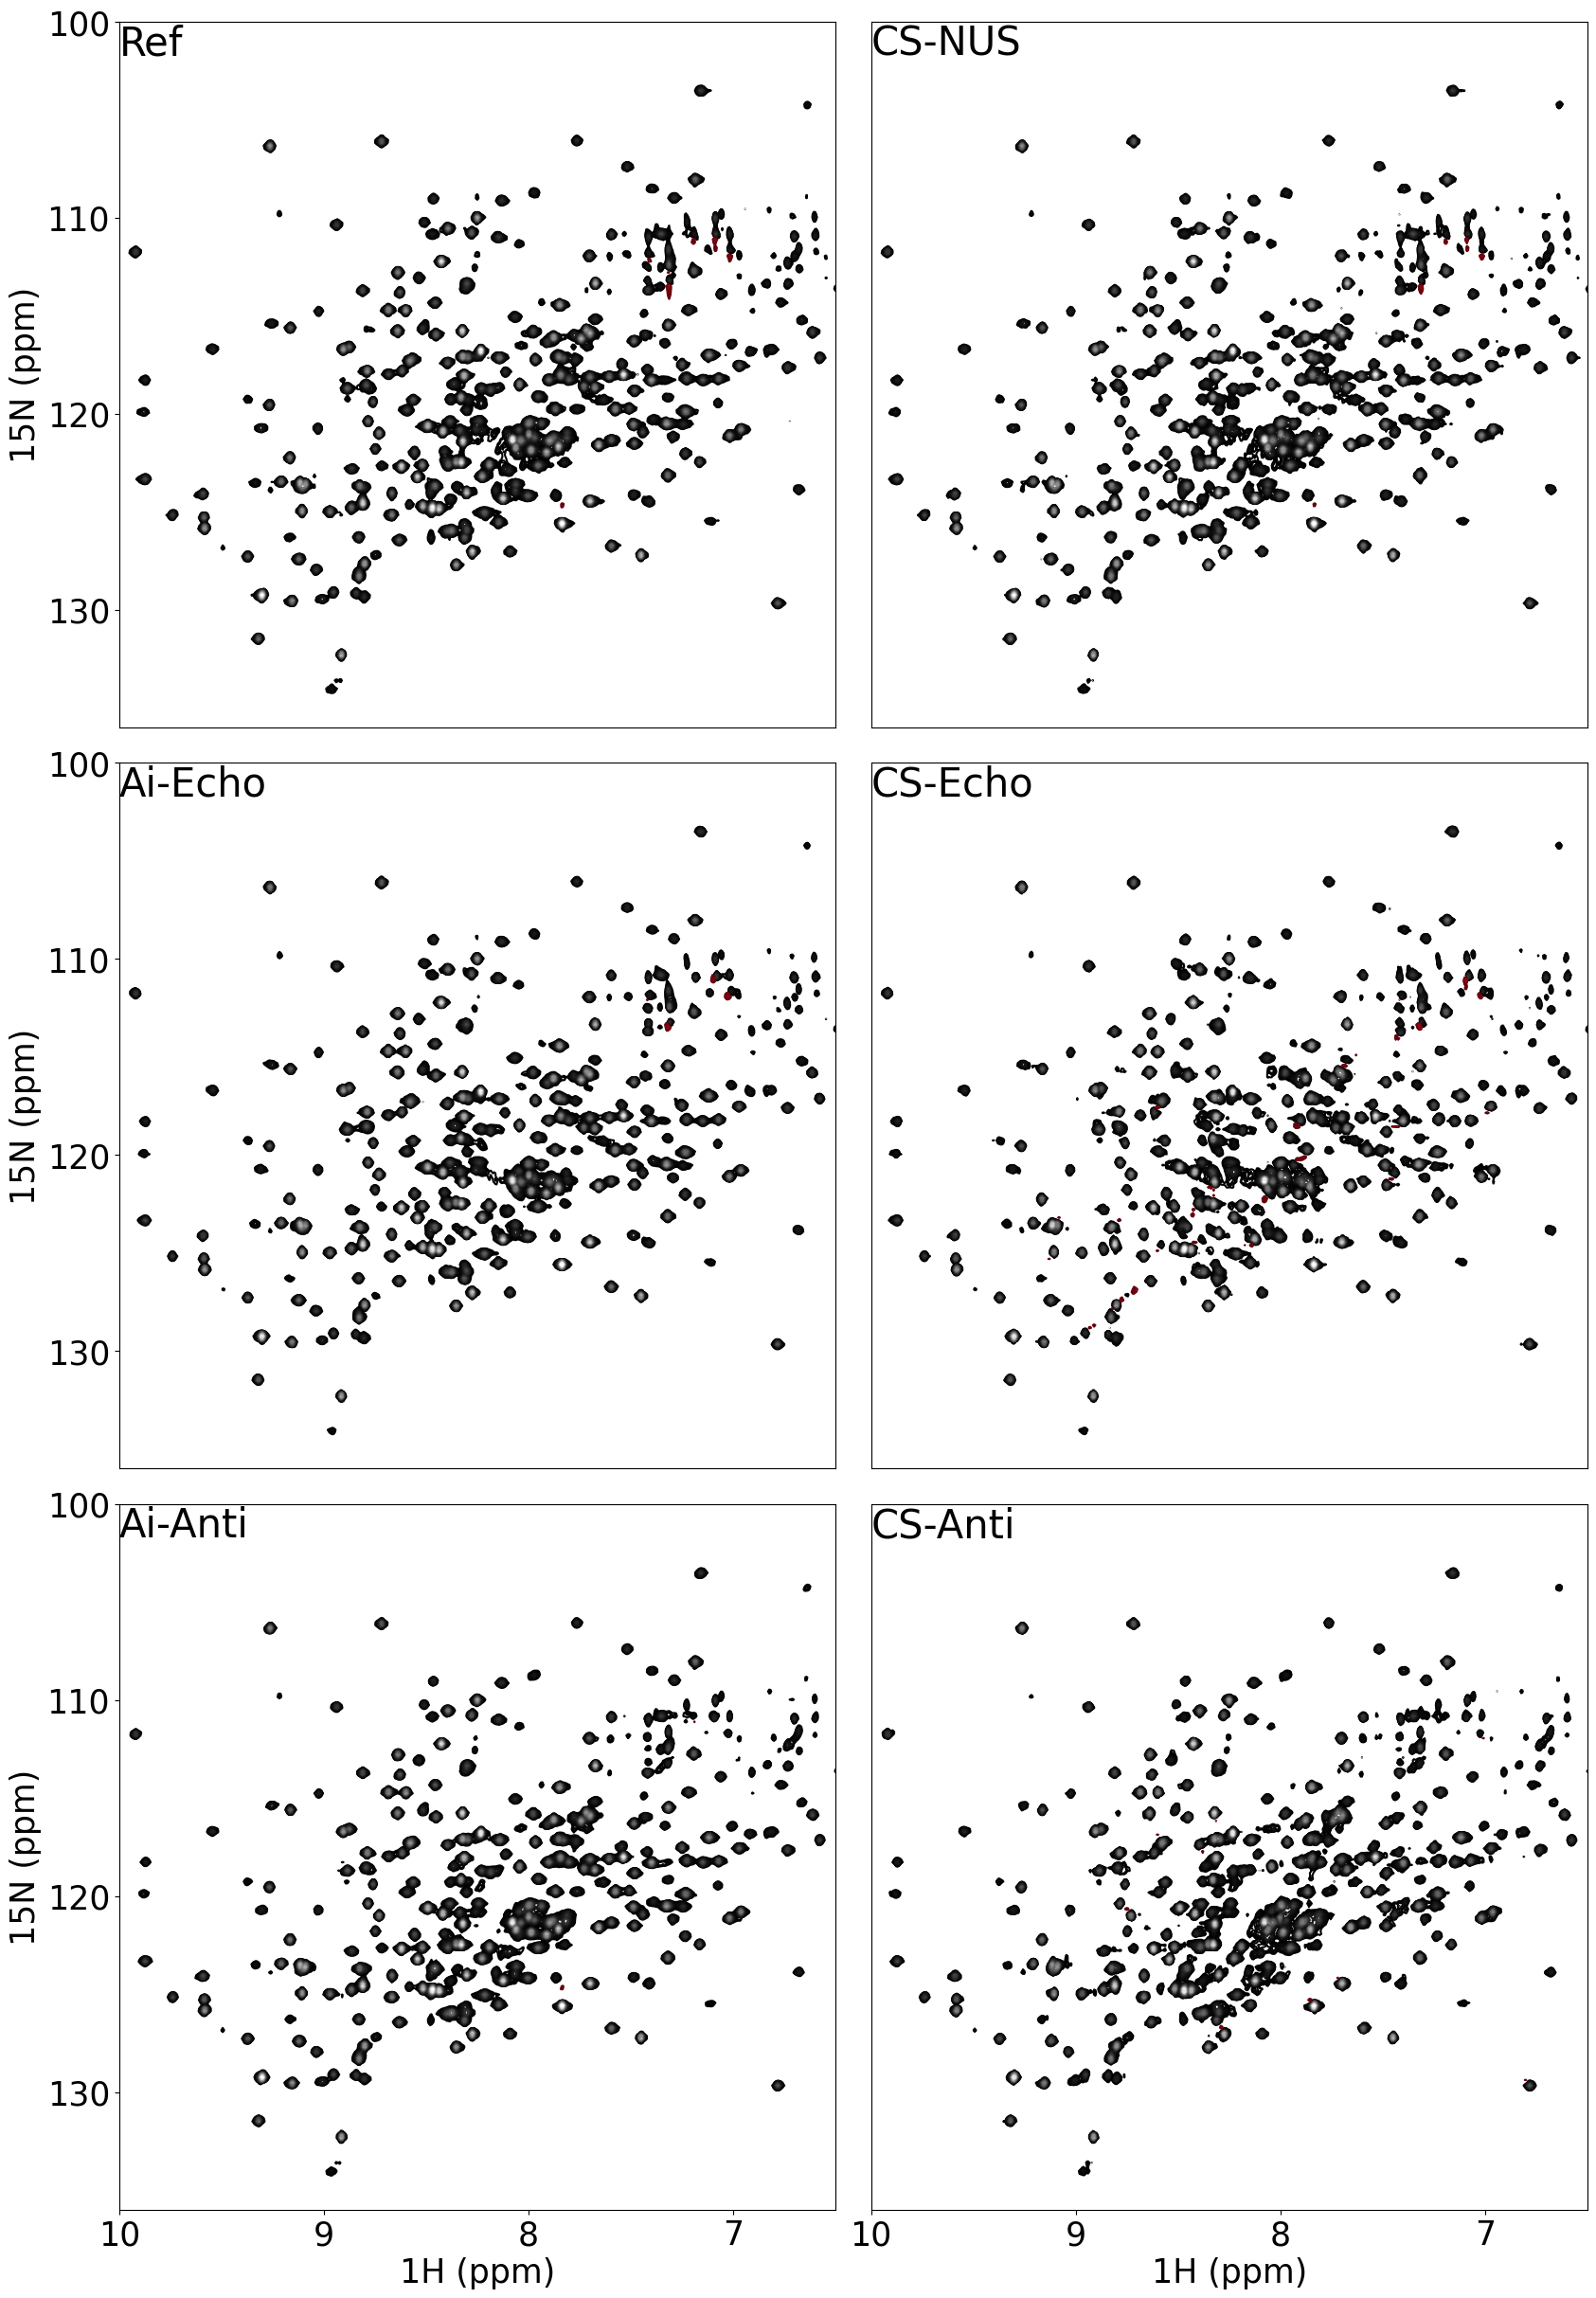

In [12]:
%%time
contours = {"Spectra/Ubi.ft2": [0.03,1.2,20] ,"Spectra/Azurin.ft2": [0.02,1.2,20],"Spectra/Tau.ft2": [0.04,1.2,20],
            "Spectra/Malt.ft2": [0.025,1.2,20],"Spectra/Data.ft2": [0.02,1.2,20]}
lims = {"Spectra/Ubi.ft2": [9.9,6,130,100],"Spectra/Azurin.ft2": [10,5.6,135,100],"Spectra/Tau.ft2": [8.5, 7.6,130, 105],
        "Spectra/Malt.ft2": [10, 6.5,136, 100],"Spectra/Data.ft2": [12.7,-3.3,138,98]}

fig, ax = plt.subplots(3,2,figsize=(2*10,3*10))
cmap = [plt.cm.Greys_r,plt.cm.Reds_r]    #[+,-] contour map (colors to use for contours)
contour = contours.get(spectrum_direction)         #[contour level start value, scaling factor between contour level]
lim = lims.get(spectrum_direction)                 #[xlim from,xlim to,ylim from,ylim to]

pr.PLOTS.subp(ax[0,0],dic,Ref/np.max(Ref), "Ref",contour,cmap,lim)
pr.PLOTS.subp(ax[0,1],dic,CS_NUS/np.max(Ref), "CS-NUS",contour,cmap,lim)

pr.PLOTS.subp(ax[1,0],dic,WNN_Echo/np.max(Ref), "Ai-Echo",contour,cmap,lim)
pr.PLOTS.subp(ax[1,1],dic,CS_Echo/np.max(Ref), "CS-Echo",contour,cmap,lim)

pr.PLOTS.subp(ax[2,0],dic,WNN_Anti/np.max(Ref), "Ai-Anti",contour,cmap,lim)
pr.PLOTS.subp(ax[2,1],dic,CS_Anti/np.max(Ref), "CS-Anti",contour,cmap,lim)

ax[0,0].axes.xaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)
ax[2,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.05)